<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/image_processing_inpainting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD on gray levle

Matrix U (shape: (256, 256)):
[[ 0.052  0.088  0.085 ... -0.02  -0.146 -0.01 ]
 [ 0.053  0.091  0.088 ...  0.092  0.339 -0.01 ]
 [ 0.053  0.094  0.091 ... -0.138 -0.356 -0.012]
 ...
 [ 0.055 -0.064  0.053 ... -0.004 -0.008  0.006]
 [ 0.055 -0.064  0.055 ... -0.008  0.011 -0.014]
 [ 0.054 -0.064  0.054 ...  0.011 -0.001  0.009]]

Singular values (length: 256):
[[140.58    0.      0.    ...   0.      0.      0.   ]
 [  0.     27.617   0.    ...   0.      0.      0.   ]
 [  0.      0.     15.499 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.011   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.01    0.   ]
 [  0.      0.      0.    ...   0.      0.      0.009]]

Top 10 singular values:
[[140.58    0.      0.      0.      0.      0.      0.      0.      0.
    0.   ]
 [  0.     27.617   0.      0.      0.      0.      0.      0.      0.
    0.   ]
 [  0.      0.     15.499   0.      0.      0.      0.      0.      0.
    0.   ]
 [  0.      0.      0.     14.6

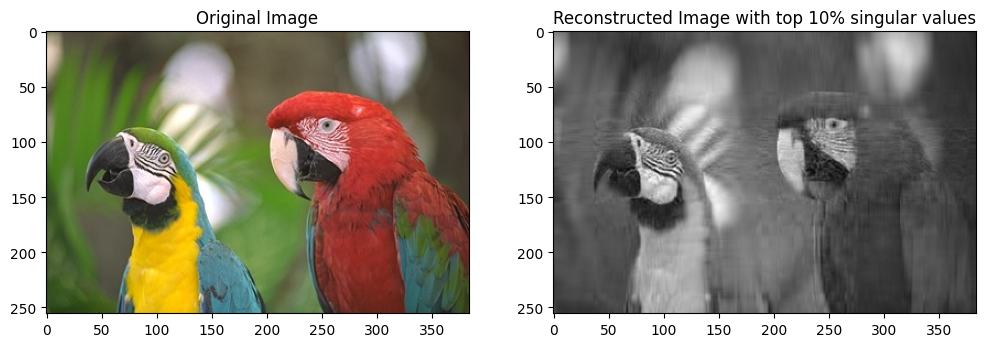

In [2]:
#######     grayscale_image for k=10%  #######
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()

# Step 6: Print matrices and singular values
def print_matrices(U, S, Vt, k):
    np.set_printoptions(precision=3, suppress=True)
    print("Matrix U (shape: {}):".format(U.shape))
    print(U)

    print("\nSingular values (length: {}):".format(len(S)))
    print(np.diag(S))  # Print singular values as a diagonal matrix

    print(f"\nTop {k} singular values:")
    print(np.diag(S[:k]))  # Print top k singular values as a diagonal matrix

    print("\nMatrix Vt (shape: {}):".format(Vt.shape))
    print(Vt)

# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)
    print_matrices(U, S, Vt, k)
    reconstructed_image = reconstruct_image(U, S, Vt, k)
    display_images(original_image, reconstructed_image, k)

# Provide the image path and the value of k
image_path = 'parrots.jpeg'  # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)

Matrix U (shape: (256, 256)):
[[ 0.052  0.088  0.085 ... -0.02  -0.146 -0.01 ]
 [ 0.053  0.091  0.088 ...  0.092  0.339 -0.01 ]
 [ 0.053  0.094  0.091 ... -0.138 -0.356 -0.012]
 ...
 [ 0.055 -0.064  0.053 ... -0.004 -0.008  0.006]
 [ 0.055 -0.064  0.055 ... -0.008  0.011 -0.014]
 [ 0.054 -0.064  0.054 ...  0.011 -0.001  0.009]]



Singular values (length: 256):
[[140.58    0.      0.    ...   0.      0.      0.   ]
 [  0.     27.617   0.    ...   0.      0.      0.   ]
 [  0.      0.     15.499 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.011   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.01    0.   ]
 [  0.      0.      0.    ...   0.      0.      0.009]]




Top 10% singular values (diagonal matrix):
[[140.58    0.      0.    ...   0.      0.      0.   ]
 [  0.     27.617   0.    ...   0.      0.      0.   ]
 [  0.      0.     15.499 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ..

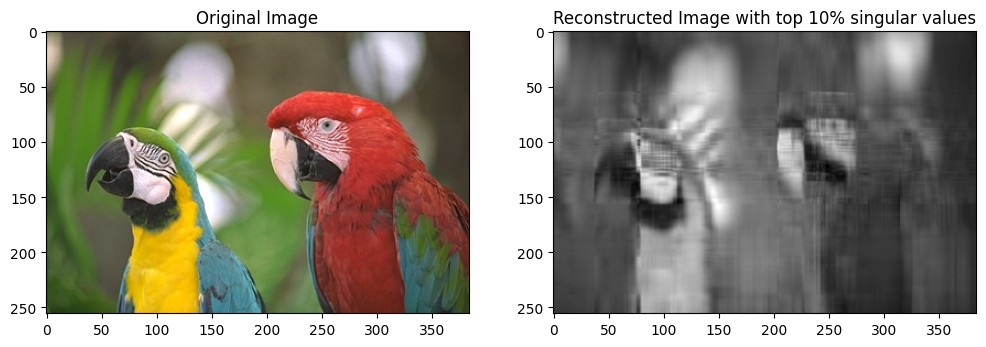

Matrix U (shape: (182, 182)):
[[ 0.086  0.065  0.013 ...  0.053  0.029  0.004]
 [ 0.09   0.044  0.022 ... -0.096 -0.044  0.   ]
 [ 0.1    0.024  0.031 ...  0.096  0.041  0.   ]
 ...
 [ 0.04   0.025  0.018 ...  0.17  -0.038  0.011]
 [ 0.04   0.024  0.019 ... -0.139  0.022  0.015]
 [ 0.039  0.016  0.012 ...  0.043 -0.009 -0.012]]



Singular values (length: 182):
[[87.837  0.     0.    ...  0.     0.     0.   ]
 [ 0.    20.59   0.    ...  0.     0.     0.   ]
 [ 0.     0.    16.421 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.103  0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.087  0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.063]]




Top 10% singular values (diagonal matrix):
[[87.837  0.     0.    ...  0.     0.     0.   ]
 [ 0.    20.59   0.    ...  0.     0.     0.   ]
 [ 0.     0.    16.421 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.  

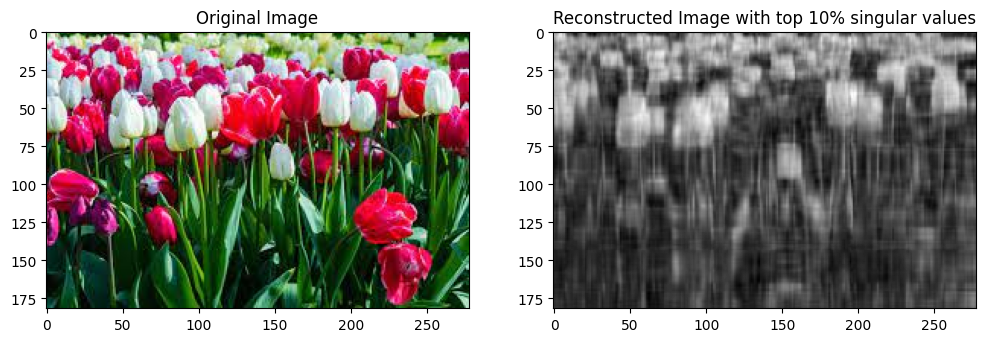

Matrix U (shape: (1080, 1080)):
[[ 0.005 -0.027  0.    ... -0.002  0.003 -0.002]
 [ 0.005 -0.027  0.    ... -0.    -0.007  0.005]
 [ 0.005 -0.027  0.    ... -0.     0.013 -0.011]
 ...
 [ 0.005 -0.027 -0.    ...  0.001 -0.     0.002]
 [ 0.005 -0.027  0.    ...  0.     0.005  0.002]
 [ 0.005 -0.026  0.    ... -0.001 -0.004 -0.002]]



Singular values (length: 1080):
[[56.086  0.     0.    ...  0.     0.     0.   ]
 [ 0.    13.776  0.    ...  0.     0.     0.   ]
 [ 0.     0.    13.391 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.004  0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.004  0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.003]]




Top 10% singular values (diagonal matrix):
[[56.086  0.     0.    ...  0.     0.     0.   ]
 [ 0.    13.776  0.    ...  0.     0.     0.   ]
 [ 0.     0.    13.391 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0

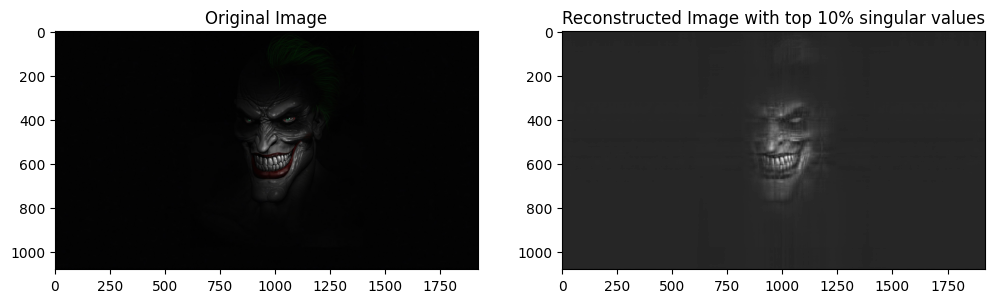

In [3]:
#######     grayscale_image for k=10%  #######
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt


# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.zeros((total_singular_values, total_singular_values))  # Create a square matrix
    S_k[:k_values, :k_values] = np.diag(S[:k_values])  # Set the top k singular values on the diagonal
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    # Ensure the dimensions are aligned for multiplication
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image
# Step 5: Reconstruct image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    reconstructed_S = np.zeros((U.shape[1], Vt.shape[0]))
    reconstructed_S[:k, :k] = np.diag(S[:k])

    reconstructed_image = U.dot(reconstructed_S).dot(Vt)
    return reconstructed_image
# Step 6: Print matrices and singular values
def print_matrices(U, S, Vt, k):
    np.set_printoptions(precision=3, suppress=True)
    print("Matrix U (shape: {}):".format(U.shape))
    print(U)

    print("\n\n\nSingular values (length: {}):".format(len(S)))
    print(np.diag(S))  # Print singular values as a diagonal matrix

    k_values = int(len(S) * k / 100)
    S_k = np.zeros_like(S)
    S_k[:k_values] = S[:k_values]
    print(f"\n\n\n\nTop {k}% singular values (diagonal matrix):")
    print(np.diag(S_k))  # Print top k singular values as a diagonal matrix

    print("\nMatrix Vt (shape: {}):".format(Vt.shape))
    print(Vt)


def process_multiple_images(image_paths, k):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            print(f"Error: Unable to read the image {image_path}. Please check the path.")
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)
        print_matrices(U, S, Vt, k)
        reconstructed_image = reconstruct_image(U, S, Vt, k)
        display_images(original_image, reconstructed_image, k)
# Main function to execute the steps
def main(image_paths, k):
    process_multiple_images(image_paths, k)

# Provide a list of image paths and the value of k
image_paths = ['parrots.jpeg', 'flowers.jpeg', 'pepak.jpg']  # Replace with your image paths
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_paths, k)